In [1]:
import os
import pandas as pd
import seaborn as sns

def table_design_name(table_design=[]):
    if table_design == []:
        return "nothing"
    else:
        return "".join(sorted(table_design))

def build_binary(table_design=[]):
    if (not os.path.exists("out_%s" % table_design_name(table_design))):
        cmd = "gapc -i ins_trace_similarity alignments.gap %s -o out_%s.cc" % (" ".join(map(lambda x: '--tab %s' % x, table_design)), table_design_name(table_design))
        cmd += " && make -f out_%s.mf" % table_design_name(table_design)
        !$cmd
    
def track_run(inputseq="A", timeout=5, table_design=[]):
    """Using a hard limit as time out to safe guard infinite executions."""
    
    cmd = "ulimit -t %s" % timeout
    cmd += " && /usr/bin/time -v ./out_%s '%s' '%s' 2>&1 | grep -e 'User time' -e 'Maximum resident set size' " % (table_design_name(table_design), inputseq, inputseq)
    res = !$cmd
    
    try:
        return {'input-length': len(inputseq),
                'user-time': float(res[0].split(': ')[-1]),
                'memory': int(res[1].split(': ')[-1]),
                'table-design': table_design_name(table_design)}
    except:
        print(res)

In [2]:
# collect measurements
results = []
for table_design in [[], ['A'], ['D', 'I', 'R'], ['D', 'I', 'R', 'A']]:
    build_binary(table_design)
    for input_length in range(0, 200, 20):
        for iteration in range(3):
            results.append(track_run('A'*input_length, table_design=table_design))
results = pd.DataFrame(results)

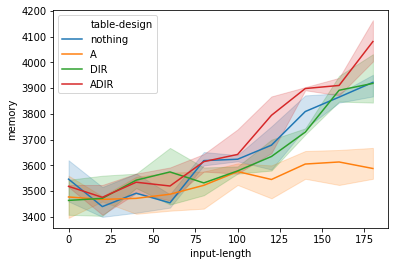

In [3]:
# looking at memory footprint, we see a difference between A (lowest) and the other table designs
g = sns.lineplot(data=results, x='input-length', y='memory', hue='table-design')

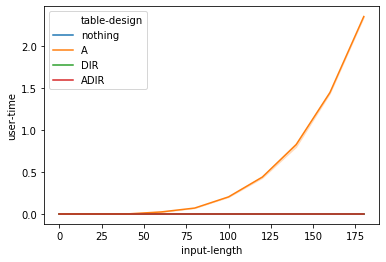

In [7]:
# hm, I'd say we have too few data to see trends here ...
g = sns.lineplot(data=results, x='input-length', y='user-time', hue='table-design')

In [13]:
# ... looking at mean values confirms, most executions where too short to really record meaningful runtimes
results.groupby(['input-length', 'table-design'])['user-time'].describe()['mean']

input-length  table-design
0             A               0.000000
              ADIR            0.000000
              DIR             0.000000
              nothing         0.000000
20            A               0.000000
              ADIR            0.000000
              DIR             0.000000
              nothing         0.000000
40            A               0.000000
              ADIR            0.000000
              DIR             0.000000
              nothing         0.000000
60            A               0.023333
              ADIR            0.000000
              DIR             0.000000
              nothing         0.000000
80            A               0.070000
              ADIR            0.000000
              DIR             0.000000
              nothing         0.000000
100           A               0.203333
              ADIR            0.000000
              DIR             0.000000
              nothing         0.000000
120           A               0.44000